### Imputation con media e mediana (dataset oversampling)

In [1]:
import sys
sys.path.append('../base_lib')

import pandas as pd
 
import functions as func
import imputation as imp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

2025-01-17 12:02:42.331464: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-17 12:02:42.331776: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-17 12:02:42.334027: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-17 12:02:42.362333: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-17 12:02:43.318432: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
dataset = pd.read_csv("../data/datiLussazioniDefinitivi.csv", delimiter=';')
dataset = func.clean_dataset(dataset)
dataset

,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,YEAR,n_luxation,GENERATION,STEMSIZE,...,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,first_lux_days_after_thr,DIRECTION,LUX_01,LUX_CR
0,3,0,56.500000,31.6,1,5.0,2021,-1.0,6,0,...,4,1,46.0,15,17.7,0,-1.0,-1.0,0,0
1,8,0,9.400000,40.9,1,5.0,2021,-1.0,6,1,...,5,1,40.0,25,27.7,0,-1.0,-1.0,0,0
2,10,0,15.133333,35.0,1,5.0,2021,-1.0,6,0,...,4,1,42.0,20,27.7,1,-1.0,-1.0,0,0
3,6,0,83.433333,18.7,0,6.0,2021,-1.0,6,2,...,4,0,40.0,18,24.2,0,-1.0,-1.0,0,0
4,5,0,7.533333,36.4,1,4.0,2021,-1.0,6,1,...,5,1,42.0,28,25.9,1,-1.0,-1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,3,0,57.433333,25.0,1,5.0,2010,1.0,4,3,...,3,0,43.0,32,27.7,0,35.0,0.0,1,1
3193,5,1,49.233333,38.0,1,6.0,2009,1.0,4,0,...,4,0,48.0,26,25.9,0,18.0,0.0,1,1
3194,13,0,38.033333,43.0,1,5.0,2008,2.0,3,1,...,4,0,48.0,4,11.5,0,30.0,0.0,1,1
3195,5,1,11.533333,28.0,1,5.0,2001,1.0,2,0,...,4,0,52.0,10,31.3,0,26.0,0.0,1,1


In [3]:
dataset[dataset.isnull().any(axis=1)]

,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,YEAR,n_luxation,GENERATION,STEMSIZE,...,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,first_lux_days_after_thr,DIRECTION,LUX_01,LUX_CR
505,10,1,31.400000,26.4,1,5.0,2019,-1.0,6,3,...,4,0,45.0,18,NaN,0,-1.0,-1.0,0,0
1397,10,0,7.600000,28.0,1,NaN,2011,-1.0,4,0,...,4,0,42.0,20,31.3,0,-1.0,-1.0,0,0
2327,3,0,14.866667,70.0,1,5.0,2018,-1.0,6,7,...,10,4,NaN,28,25.9,0,-1.0,-1.0,0,0
3176,7,0,14.100000,56.0,1,NaN,2011,1.0,4,1,...,4,1,40.0,15,39.5,0,1626.0,0.0,1,1


In [4]:
dataset.isna().sum()

BREED                       0
GENDER_01                   0
AGEATSURGERYmo              0
BODYWEIGHTKG                0
Taglia                      0
BCS                         2
YEAR                        0
n_luxation                  0
GENERATION                  0
STEMSIZE                    0
CUPSIZE                     0
NECKSIZE                    0
HEADSIZE                    0
ALO                         1
CUPRETROVERSION             0
STEMANTEVERSIONREAL         1
RECTUSFEMORISM.RELEASE      0
first_lux_days_after_thr    0
DIRECTION                   0
LUX_01                      0
LUX_CR                      0
dtype: int64

In [5]:
dataset_imputed = imp.total_imputation_mean_median(dataset)

dataset_imputed.isna().sum()

BREED                       0
GENDER_01                   0
AGEATSURGERYmo              0
BODYWEIGHTKG                0
Taglia                      0
BCS                         0
YEAR                        0
n_luxation                  0
GENERATION                  0
STEMSIZE                    0
CUPSIZE                     0
NECKSIZE                    0
HEADSIZE                    0
ALO                         0
CUPRETROVERSION             0
STEMANTEVERSIONREAL         0
RECTUSFEMORISM.RELEASE      0
first_lux_days_after_thr    0
DIRECTION                   0
LUX_01                      0
LUX_CR                      0
dtype: int64

In [18]:
new_values_bcs = dataset[['BCS'].isna()]['BCS']
new_values_bcs

Series([], Name: BCS, dtype: float64)

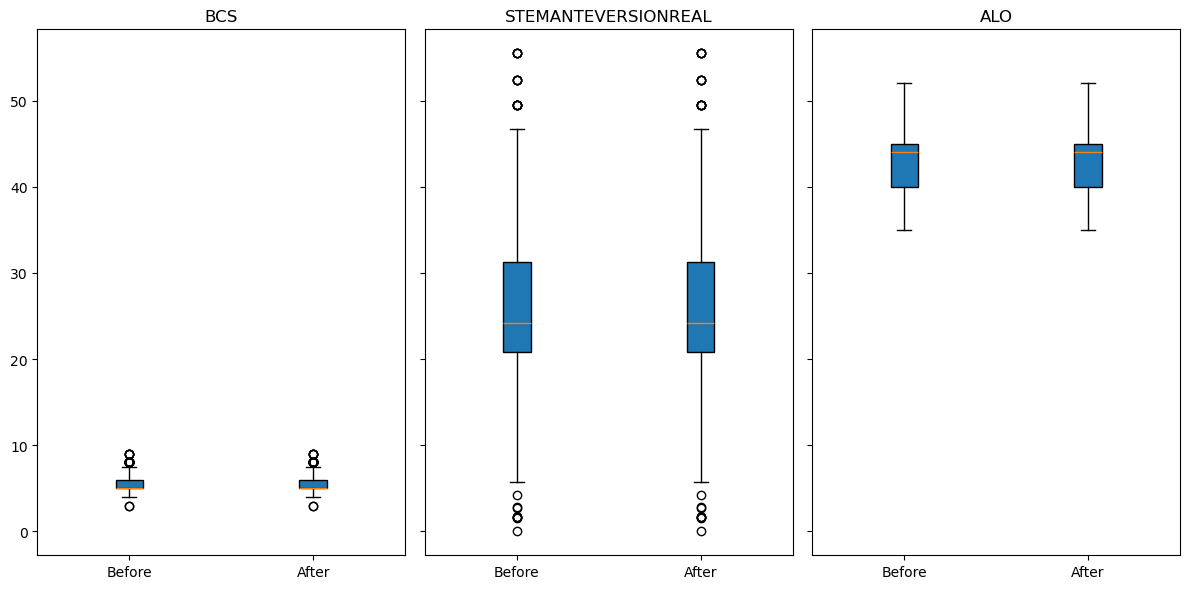

In [13]:

# Filtra le colonne di interesse
columns_of_interest = ['BCS', 'STEMANTEVERSIONREAL', 'ALO']
dataset = dataset[columns_of_interest]
dataset_imputed = dataset_imputed[columns_of_interest]

# Identificazione dei valori imputati
imputed_values = []
for col in dataset.columns:
    for idx in range(len(dataset)):
        if pd.isna(dataset.loc[idx, col]) and not pd.isna(dataset_imputed.loc[idx, col]):
            imputed_values.append((col, idx, dataset_imputed.loc[idx, col]))

# Creazione dei boxplot
fig, axes = plt.subplots(1, len(dataset.columns), figsize=(12, 6), sharey=True)
if len(dataset.columns) == 1:
    axes = [axes]  # Per gestire il caso di un singolo asse

for i, col in enumerate(dataset.columns):
    # Raccolta dei dati per il boxplot
    data = [dataset[col].dropna(), dataset_imputed[col].dropna()]
    
    # Creazione del boxplot
    axes[i].boxplot(data, labels=['Before', 'After'], patch_artist=True)
    axes[i].set_title(col)

    # Evidenziazione dei valori imputati
    for imputed in imputed_values:
        if imputed[0] == col:
            # Valore imputato nel boxplot "After"
            axes[i].plot(2, imputed[2], 'ro', label='Imputed value' if i == 0 else "")

# Aggiunta della legenda
handles, labels = axes[0].get_legend_handles_labels()
if handles:
    fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()


In [9]:
def plot_boxplot_con_valori_imputati(original, imputato, colonna):
    """
    Traccia i boxplot prima e dopo l'imputazione, evidenziando i valori imputati in rosso.
    
    Args:
        original (pd.DataFrame): Dataset con valori mancanti.
        imputato (pd.DataFrame): Dataset con valori imputati.
        colonna (str): Nome della colonna da visualizzare.
    """
    # Identifica gli indici dei valori imputati (dove i valori mancanti sono stati riempiti)
    imputati_idx = original[colonna].isna()
    
    if not imputati_idx.any():
        print(f"Non ci sono valori imputati per la colonna '{colonna}'.")
        return
    
    # Dati per il grafico
    dati_originali = original[colonna].dropna()  # Valori originali (senza NaN)
    dati_imputati = imputato[colonna]  # Valori dopo l'imputazione
    valori_imputati = imputato.loc[imputati_idx, colonna]  # Solo i valori imputati
    
    # Crea la figura
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Traccia i boxplot prima e dopo l'imputazione
    box_originali = ax.boxplot(
        [dati_originali],
        positions=[1],
        widths=0.6,
        patch_artist=True,
        boxprops=dict(facecolor="lightgray", color="black"),
        medianprops=dict(color="black")
    )
    box_imputati = ax.boxplot(
        [dati_imputati],
        positions=[2],
        widths=0.6,
        patch_artist=True,
        boxprops=dict(facecolor="lightblue", color="black"),
        medianprops=dict(color="black")
    )
    
    # Sovrapposizione dei valori imputati come punti rossi
    ax.scatter(
        x=[2] * len(valori_imputati),  # Posizione sul secondo boxplot
        y=valori_imputati,
        color="red",
        zorder=3,
        label="Valori imputati"
    )
    
    # Etichette e legenda
    ax.set_xticks([1, 2])
    ax.set_xticklabels(["Prima dell'imputazione", "Dopo l'imputazione"])
    ax.set_title(f"Boxplot di '{colonna}' prima e dopo l'imputazione")
    ax.set_ylabel(colonna)
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))  # Legenda fuori dal grafico
    
    # Mostra il grafico
    plt.tight_layout()
    plt.show()


# Applica la funzione alle colonne
colonne = ['BCS', 'ALO', 'STEMANTEVERSIONREAL']

for col in colonne:
    plot_boxplot_con_valori_imputati(dataset, dataset_imputed, col)


Non ci sono valori imputati per la colonna 'BCS'.
Non ci sono valori imputati per la colonna 'ALO'.
Non ci sono valori imputati per la colonna 'STEMANTEVERSIONREAL'.


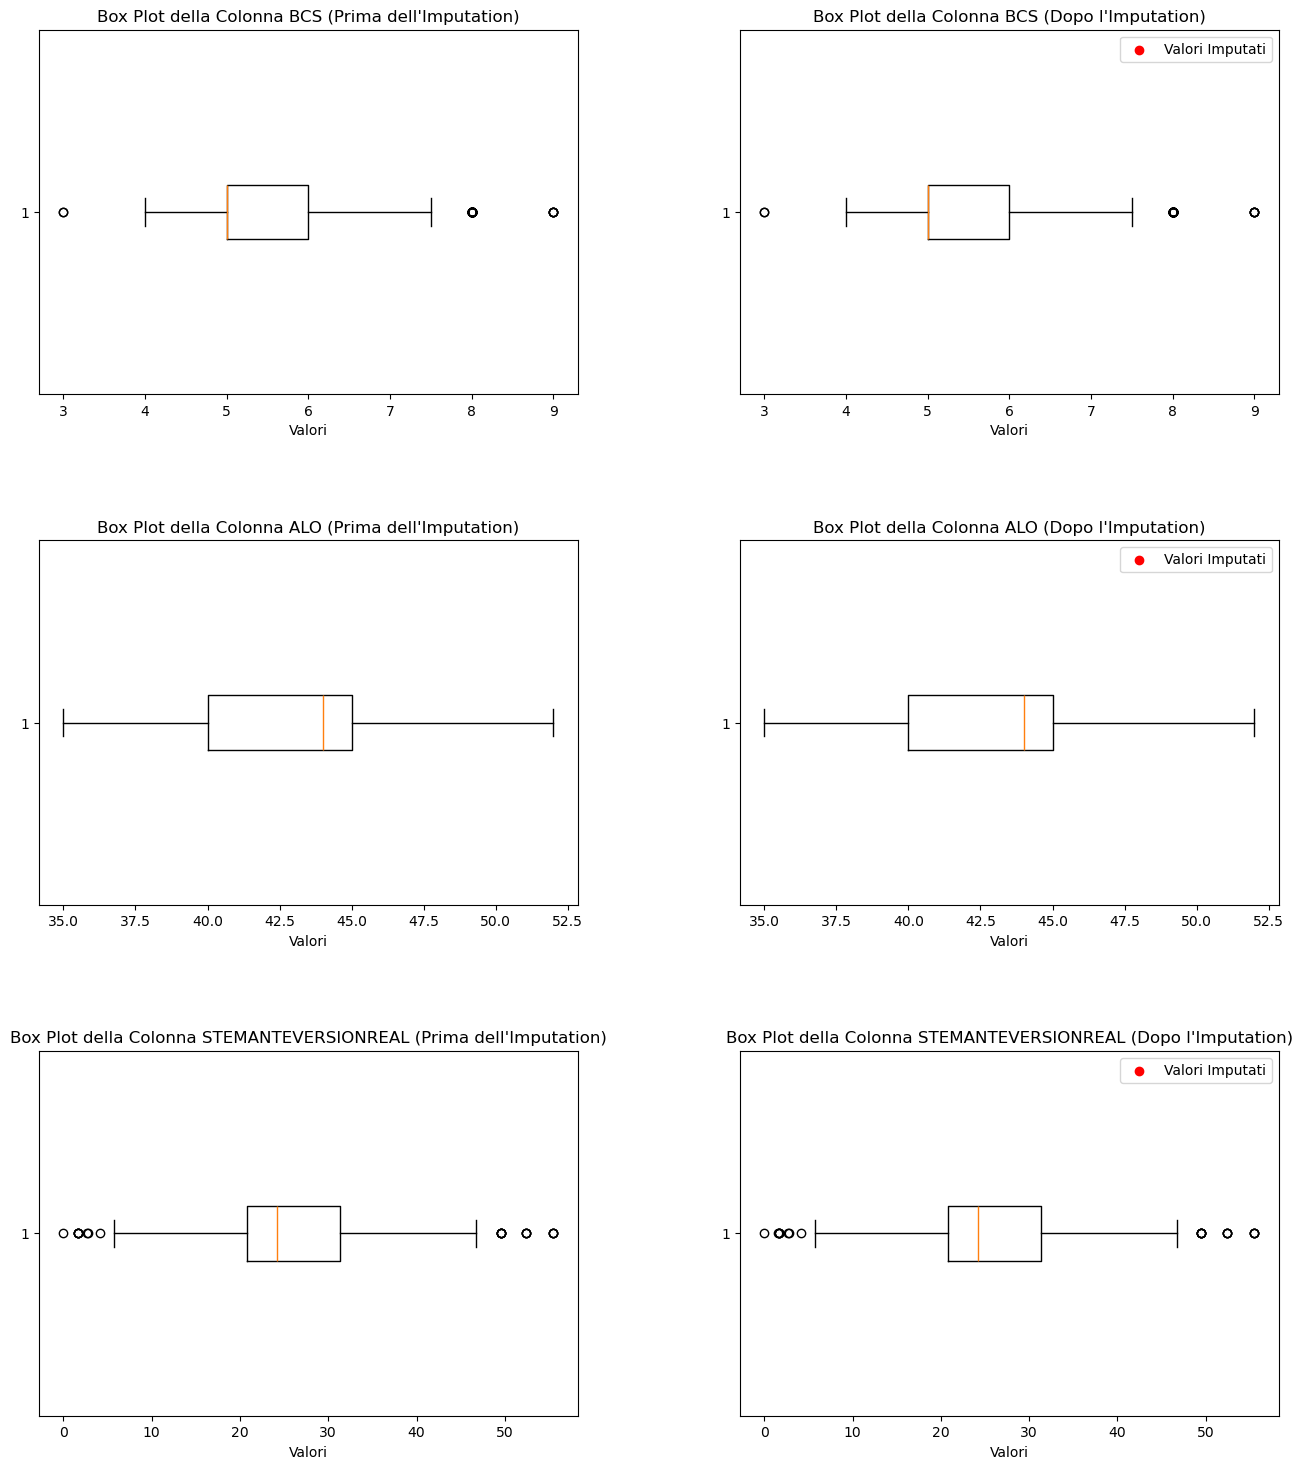

In [7]:


# Creazione della figura con una dimensione maggiore per adattare tutti i grafici
plt.figure(figsize=(16, 18))

# Impostazione degli spazi tra i sottoplot per evitare sovrapposizioni
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Box plot e scatter plot per la colonna BCS
new_values_bcs = dataset_imputed[dataset['BCS'].isna()]['BCS']
plt.subplot(3, 2, 1)
plt.boxplot(dataset['BCS'].dropna(), vert=False)
plt.title('Box Plot della Colonna BCS (Prima dell\'Imputation)', fontsize=12)
plt.xlabel('Valori', fontsize=10)

plt.subplot(3, 2, 2)
plt.boxplot(dataset_imputed['BCS'], vert=False)
plt.scatter(new_values_bcs, [1]*len(new_values_bcs), color='red', label='Valori Imputati')
plt.title('Box Plot della Colonna BCS (Dopo l\'Imputation)', fontsize=12)
plt.xlabel('Valori', fontsize=10)
plt.legend(fontsize=10)

# Box plot e scatter plot per la colonna ALO
new_values_alo = dataset_imputed[dataset['ALO'].isna()]['ALO']
plt.subplot(3, 2, 3)
plt.boxplot(dataset['ALO'].dropna(), vert=False)
plt.title('Box Plot della Colonna ALO (Prima dell\'Imputation)', fontsize=12)
plt.xlabel('Valori', fontsize=10)

plt.subplot(3, 2, 4)
plt.boxplot(dataset_imputed['ALO'], vert=False)
plt.scatter(new_values_alo, [1]*len(new_values_alo), color='red', label='Valori Imputati')
plt.title('Box Plot della Colonna ALO (Dopo l\'Imputation)', fontsize=12)
plt.xlabel('Valori', fontsize=10)
plt.legend(fontsize=10)

# Box plot e scatter plot per la colonna STEMANTEVERSIONREAL
new_values_STEMANTEVERSIONREAL = dataset_imputed[dataset['STEMANTEVERSIONREAL'].isna()]['STEMANTEVERSIONREAL']
plt.subplot(3, 2, 5)
plt.boxplot(dataset['STEMANTEVERSIONREAL'].dropna(), vert=False)
plt.title('Box Plot della Colonna STEMANTEVERSIONREAL (Prima dell\'Imputation)', fontsize=12)
plt.xlabel('Valori', fontsize=10)

plt.subplot(3, 2, 6)
plt.boxplot(dataset_imputed['STEMANTEVERSIONREAL'], vert=False)
plt.scatter(new_values_STEMANTEVERSIONREAL, [1]*len(new_values_STEMANTEVERSIONREAL), color='red', label='Valori Imputati')
plt.title('Box Plot della Colonna STEMANTEVERSIONREAL (Dopo l\'Imputation)', fontsize=12)
plt.xlabel('Valori', fontsize=10)
plt.legend(fontsize=10)

# Mostrare la figura
plt.show()

In [10]:
import pandas as pd

dataset = pd.read_csv('/home/biso/Tirocinio/tirocinio/datiLussazioniDefinitivi.csv', delimiter=';')
dataset

,CASE_ID,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,INDICATIONFORTHR,HIPRL,YEAR,...,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,first_lux_days_after_thr,DIRECTION,LUX_01,LUX_CR
0,1,3,0,"56,5","31,6",1,5,4,R,2021,...,4,1,46.0,15,"17,7",NO,NaN,NaN,0,0
1,2,8,0,"9,4","40,9",1,5,4,L,2021,...,5,1,40.0,25,"27,7",NO,NaN,NaN,0,0
2,3,10,0,"15,1333333333333",35,1,5,4,R,2021,...,4,1,42.0,20,"27,7",YES,NaN,NaN,0,0
3,4,6,0,"83,4333333333333","18,7",0,6,4,L,2021,...,4,0,40.0,18,"24,2",NO,NaN,NaN,0,0
4,5,5,0,"7,53333333333333","36,4",1,4,4,L,2021,...,5,1,42.0,28,"25,9",YES,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,3193,3,0,"57,4333333333333",25,1,5,2,R,2010,...,3,0,43.0,32,"27,7",NO,35.0,CRANIO-DORSALE,1,1
3193,3194,5,1,"49,2333333333333",38,1,6,2,R,2009,...,4,0,48.0,26,"25,9",NO,18.0,CRANIO-DORSALE,1,1
3194,3195,13,0,"38,0333333333333",43,1,5,2,R,2008,...,4,0,48.0,4,"11,5",NO,30.0,CRANIO-DORSALE,1,1
3195,3196,5,1,"11,5333333333333",28,1,5,2,R,2001,...,4,0,52.0,10,"31,3",NO,26.0,CRANIO-DORSALE,1,1


In [11]:
import sys

sys.path.append('/home/biso/Tirocinio/tirocinio/base_lib')

In [12]:
import functions as func 
import models 
import imputation as imp 

In [13]:
dataset = func.clean_dataset(dataset)

cols = ['n_luxation', 'first_lux_days_after_thr', 'DIRECTION']
dataset[cols] = dataset[cols].fillna(-1)

In [14]:
dataset.isna().sum()

CASE_ID                     0
BREED                       0
GENDER_01                   0
AGEATSURGERYmo              0
BODYWEIGHTKG                0
Taglia                      0
BCS                         2
INDICATIONFORTHR            0
HIPRL                       1
YEAR                        0
n_luxation                  0
GENERATION                  0
STEMSIZE                    0
CUPSIZE                     0
NECKSIZE                    0
HEADSIZE                    0
ALO                         1
CUPRETROVERSION             0
STEMANTEVERSIONREAL         1
RECTUSFEMORISM.RELEASE      0
first_lux_days_after_thr    0
DIRECTION                   0
LUX_01                      0
LUX_CR                      0
dtype: int64

In [15]:
dataset_valori_nan = dataset[dataset.isnull().any(axis=1)]
dataset_valori_nan

,CASE_ID,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,INDICATIONFORTHR,HIPRL,YEAR,...,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,first_lux_days_after_thr,DIRECTION,LUX_01,LUX_CR
505,506,10,1,31.400000,26.4,1,5.0,4,1.0,2019,...,4,0,45.0,18,NaN,0,-1.0,-1.0,0,0
1397,1398,10,0,7.600000,28.0,1,NaN,4,0.0,2011,...,4,0,42.0,20,31.3,0,-1.0,-1.0,0,0
2327,2328,3,0,14.866667,70.0,1,5.0,4,0.0,2018,...,10,4,NaN,28,25.9,0,-1.0,-1.0,0,0
2516,2517,3,1,23.000000,53.7,1,5.0,2,NaN,2021,...,6,2,40.0,15,19.2,0,-1.0,-1.0,0,1
3176,3177,7,0,14.100000,56.0,1,NaN,2,0.0,2011,...,4,1,40.0,15,39.5,0,1626.0,0.0,1,1


In [7]:
dataset_imputed = imp.total_imputation_mean_median(dataset)

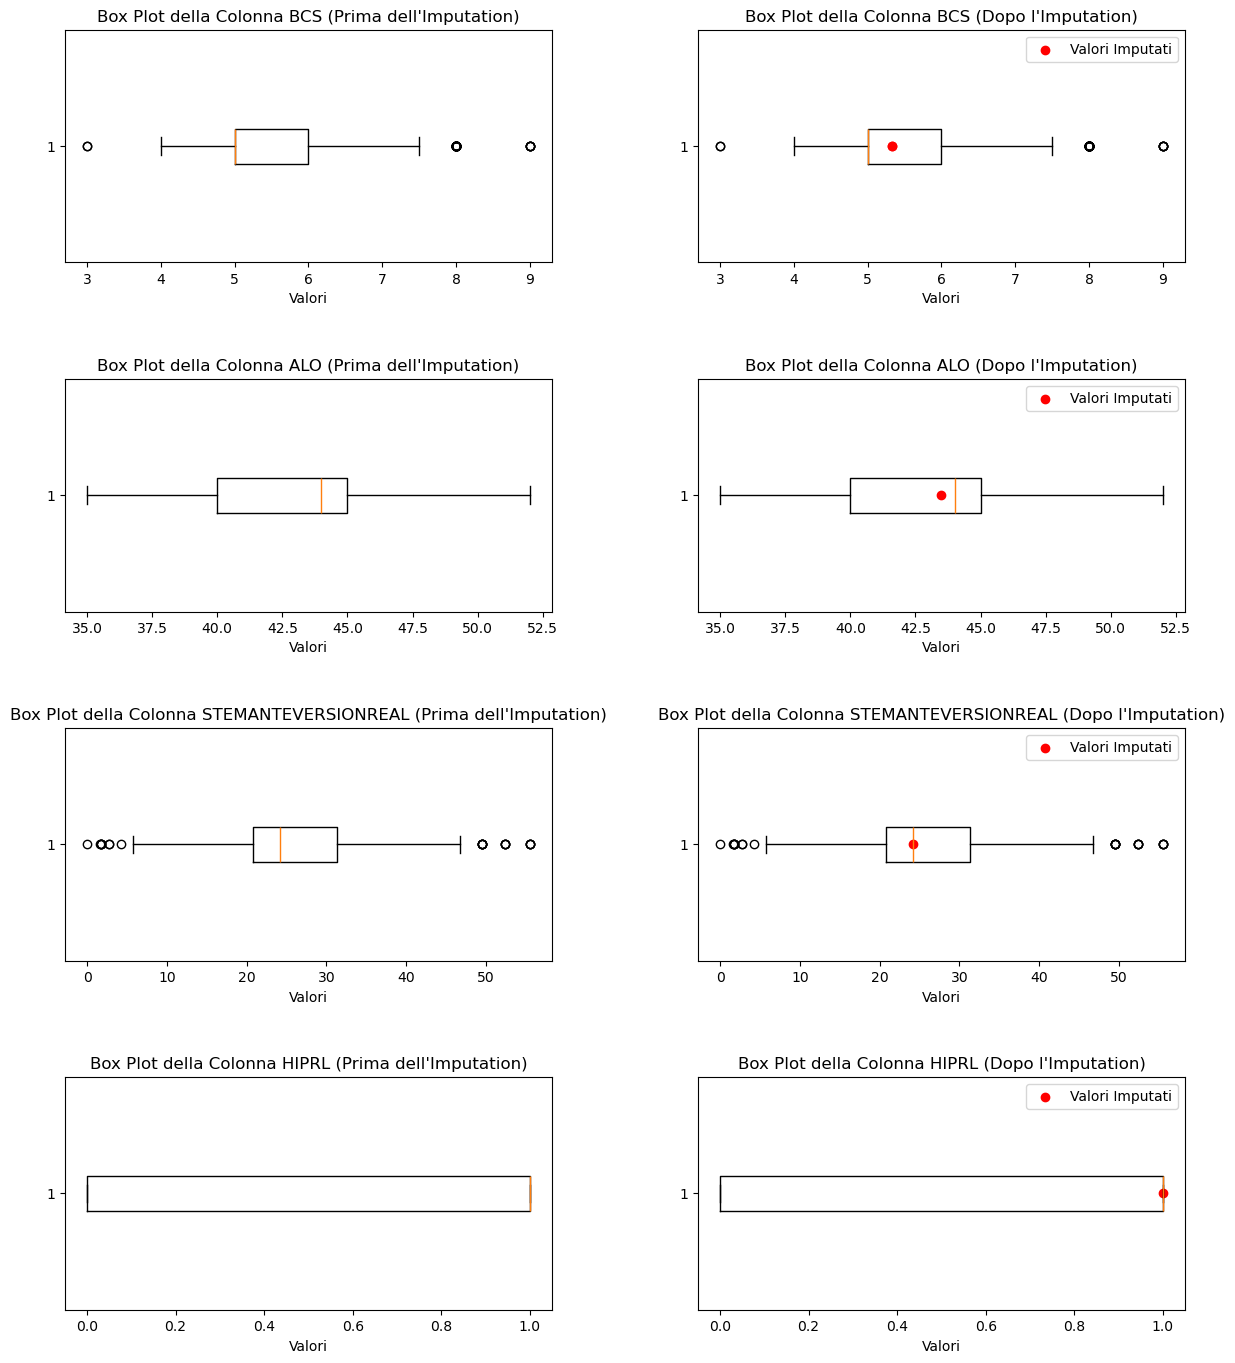

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(14, 16))

new_values_bcs = dataset_imputed[dataset['BCS'].isna()]['BCS']

# Box plot e scatter plot per la colonna BCS
plt.subplot(4, 2, 1)
plt.boxplot(dataset['BCS'].dropna(), vert=False)
plt.title('Box Plot della Colonna BCS (Prima dell\'Imputation)')
plt.xlabel('Valori')

plt.subplot(4, 2, 2)
plt.boxplot(dataset_imputed['BCS'], vert=False)
plt.scatter(new_values_bcs, [1]*len(new_values_bcs), color='red', label='Valori Imputati')
plt.title('Box Plot della Colonna BCS (Dopo l\'Imputation)')
plt.xlabel('Valori')
plt.legend()

new_values_alo = dataset_imputed[dataset['ALO'].isna()]['ALO']

# Box plot e scatter plot per la colonna ALO
plt.subplot(4, 2, 3)
plt.boxplot(dataset['ALO'].dropna(), vert=False)
plt.title('Box Plot della Colonna ALO (Prima dell\'Imputation)')
plt.xlabel('Valori')

plt.subplot(4, 2, 4)
plt.boxplot(dataset_imputed['ALO'], vert=False)
plt.scatter(new_values_alo, [1]*len(new_values_alo), color='red', label='Valori Imputati')
plt.title('Box Plot della Colonna ALO (Dopo l\'Imputation)')
plt.xlabel('Valori')
plt.legend()

new_values_STEMANTEVERSIONREAL = dataset_imputed[dataset['STEMANTEVERSIONREAL'].isna()]['STEMANTEVERSIONREAL']

# Box plot e scatter plot per la colonna STEMANTEVERSIONREAL
plt.subplot(4, 2, 5)
plt.boxplot(dataset['STEMANTEVERSIONREAL'].dropna(), vert=False)
plt.title('Box Plot della Colonna STEMANTEVERSIONREAL (Prima dell\'Imputation)')
plt.xlabel('Valori')

plt.subplot(4, 2, 6)
plt.boxplot(dataset_imputed['STEMANTEVERSIONREAL'], vert=False)
plt.scatter(new_values_STEMANTEVERSIONREAL, [1]*len(new_values_STEMANTEVERSIONREAL), color='red', label='Valori Imputati')
plt.title('Box Plot della Colonna STEMANTEVERSIONREAL (Dopo l\'Imputation)')
plt.xlabel('Valori')
plt.legend()

new_values_HIPRL = dataset_imputed[dataset['HIPRL'].isna()]['HIPRL']

# Box plot e scatter plot per la colonna HIPRL
plt.subplot(4, 2, 7)
plt.boxplot(dataset['HIPRL'].dropna(), vert=False)
plt.title('Box Plot della Colonna HIPRL (Prima dell\'Imputation)')
plt.xlabel('Valori')

plt.subplot(4, 2, 8)
plt.boxplot(dataset_imputed['HIPRL'], vert=False)
plt.scatter(new_values_HIPRL, [1]*len(new_values_HIPRL), color='red', label='Valori Imputati')
plt.title('Box Plot della Colonna HIPRL (Dopo l\'Imputation)')
plt.xlabel('Valori')
plt.legend()

# Aggiungere spazio tra i grafici e ai bordi
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3, left=0.1, right=0.9, top=0.9, bottom=0.1)  # Aggiungere spazio tra i grafici e ai bordi

plt.show()

In [21]:
dataset_imputed[dataset['BCS'].isna()]['BCS']

1397    5.323005
3176    5.323005
Name: BCS, dtype: float64

In [22]:
dataset_imputed[dataset['HIPRL'].isna()]['HIPRL']

2516    1.0
Name: HIPRL, dtype: float64

In [23]:
dataset_imputed[dataset['STEMANTEVERSIONREAL'].isna()]['STEMANTEVERSIONREAL']

505    24.2
Name: STEMANTEVERSIONREAL, dtype: float64

In [24]:
dataset_imputed[dataset['ALO'].isna()]['ALO']

2327    43.463705
Name: ALO, dtype: float64

In [25]:
dataset = dataset_imputed

In [26]:
dataset.isna().sum()

CASE_ID                     0
BREED                       0
GENDER_01                   0
AGEATSURGERYmo              0
BODYWEIGHTKG                0
Taglia                      0
BCS                         0
INDICATIONFORTHR            0
HIPRL                       0
YEAR                        0
n_luxation                  0
GENERATION                  0
STEMSIZE                    0
CUPSIZE                     0
NECKSIZE                    0
HEADSIZE                    0
ALO                         0
CUPRETROVERSION             0
STEMANTEVERSIONREAL         0
RECTUSFEMORISM.RELEASE      0
first_lux_days_after_thr    0
DIRECTION                   0
LUX_01                      0
LUX_CR                      0
dtype: int64

In [27]:
# Definizione di X e y

# insieme di predittori
feature_cols = ['CASE_ID', 'BREED', 'GENDER_01', 'AGEATSURGERYmo', 'BODYWEIGHTKG', 'Taglia', 'BCS', 'INDICATIONFORTHR', 'HIPRL', 
                'YEAR', 'GENERATION', 'STEMSIZE', 'CUPSIZE', 'NECKSIZE', 'HEADSIZE', 'ALO', 'CUPRETROVERSION', 'STEMANTEVERSIONREAL', 
                'RECTUSFEMORISM.RELEASE', 'LUX_CR', 'n_luxation', 'DIRECTION', 'first_lux_days_after_thr']
X = dataset[feature_cols]

# variabile di risposta, è una variabile binaria
y = dataset['LUX_01']

In [29]:
dataset = func.oversampling(X, y)

In [35]:
dataset = dataset.sample(frac=1, random_state=42)

In [36]:
feature_cols = ['BREED', 'GENDER_01', 'AGEATSURGERYmo', 'BODYWEIGHTKG', 'Taglia', 'BCS', 'INDICATIONFORTHR', 'HIPRL', 
                'YEAR', 'GENERATION', 'STEMSIZE', 'CUPSIZE', 'NECKSIZE', 'HEADSIZE', 'ALO', 'CUPRETROVERSION', 'STEMANTEVERSIONREAL', 
                'RECTUSFEMORISM.RELEASE', 'LUX_CR']

X = dataset[feature_cols]
y = dataset['target']

# la feature LUX_01 è stata cambiata in target dopo l'oversampling

### Regressione logistica sulla feature target

In [37]:
model = models.logistic_regression_model(X, y)

Report di classificazione:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       907
           1       0.73      0.80      0.76       927

    accuracy                           0.74      1834
   macro avg       0.75      0.74      0.74      1834
weighted avg       0.75      0.74      0.74      1834



### Regressione logistica con cross validation

In [38]:
model = models.logistic_regression_cv_model(X, y, cv=5)

Report di classificazione:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       907
           1       0.73      0.80      0.76       927

    accuracy                           0.75      1834
   macro avg       0.75      0.75      0.74      1834
weighted avg       0.75      0.75      0.75      1834



### Regressione logistica con grid search cv

In [39]:
param_grid = {
    'C': [0.01, 0.1, 1]
}

model = models.logistic_regression_gridsearchcv_model(X=X,
                                                      y=y,
                                                      param_grid=param_grid,
                                                      cv=5,
                                                      scoring='accuracy')

Report di classificazione:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       907
           1       0.73      0.80      0.76       927

    accuracy                           0.75      1834
   macro avg       0.75      0.75      0.75      1834
weighted avg       0.75      0.75      0.75      1834

Migliori parametri: {'C': 1}


### Albero di decisione

In [40]:
model = models.decision_tree_model(X=X,
                                   y=y,
                                   max_depth=15)

Report di classificazione:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       907
           1       0.91      0.92      0.91       927

    accuracy                           0.91      1834
   macro avg       0.91      0.91      0.91      1834
weighted avg       0.91      0.91      0.91      1834



### Albero di decisione con grid search cv

In [41]:
param_grid = {
    'max_depth': [5, 10, 15]
}

model = models.decision_tree_gridsearchcv_model(X=X,
                                                y=y,
                                                param_grid=param_grid,
                                                cv=10,
                                                scoring='accuracy')

Report di classificazione:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       907
           1       0.91      0.92      0.91       927

    accuracy                           0.91      1834
   macro avg       0.91      0.91      0.91      1834
weighted avg       0.91      0.91      0.91      1834

Migliori parametri: {'max_depth': 15}


### Random forest

In [42]:
model = models.random_forest_model(X=X,
                                   y=y,
                                   n_estimators=10,
                                   max_depth=10)

Report di classificazione:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       907
           1       0.93      0.94      0.93       927

    accuracy                           0.93      1834
   macro avg       0.93      0.93      0.93      1834
weighted avg       0.93      0.93      0.93      1834



### Random forest con grid search cv

In [43]:
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'n_estimators': [7, 9, 11, 13]
}

model = models.random_forest_gridsearchcv_model(X=X,
                                                y=y,
                                                param_grid=param_grid,
                                                cv=10,
                                                scoring='accuracy')

Report di classificazione:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       907
           1       0.97      0.96      0.96       927

    accuracy                           0.96      1834
   macro avg       0.96      0.96      0.96      1834
weighted avg       0.96      0.96      0.96      1834

Migliori parametri: {'max_depth': 16, 'n_estimators': 13}
